In [52]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
import numpy as np
import copy
import numbers

%matplotlib inline

# Read Data

In [54]:
def fix_data(data):
    """Convert dataframe to appropriate types"""
    for x in range(1,5):
        data.loc[data['Column3'] == x, 'Column3'] = str(x)

    num_col = [4, 5, 6, 8, 9, 10, 12]
    
    for col in num_col:
        col_name = 'Column'+str(col)
        data[col_name] = pd.to_numeric(data[col_name], errors='coerce')
    
    return data

def show_data(df, columns):
    data = copy.deepcopy(df)
    data.columns = columns
    
    return data

In [169]:
# data columns and read data from files

heart_disease = {}
heart_disease['columns_detail'] = [
    'Age', 
    'Sex', 
    'Pain type', 
    'Blood pressure', 
    'Serum cholesterol', 
    'Fasting blood sugar > 120mg/dl', 
    'Resting ECG', 
    'Max heart rate achieved', 
    'exercise induced agina', 
    'ST depression induced by exercise relative to rest', 
    'Peak exercise ST segment', 
    'Number of major vessels colored by flourosopy', 
    'Thal', 
    'Diagnosis'
]
heart_disease['train'] = pd.read_csv('../data/tubes2_HeartDisease_train.csv')
heart_disease['test'] = pd.read_csv('../data/tubes2_HeartDisease_test.csv')

In [56]:
heart_disease['train'] = fix_data(heart_disease['train'])
show_data(heart_disease['train'], heart_disease['columns_detail']).head()

,Age,Sex,Pain type,Blood pressure,Serum cholesterol,Fasting blood sugar > 120mg/dl,Resting ECG,Max heart rate achieved,exercise induced agina,ST depression induced by exercise relative to rest,Peak exercise ST segment,Number of major vessels colored by flourosopy,Thal,Diagnosis
0,54,1,4,125.0,216.0,0.0,0,140.0,0.0,0.0,?,NaN,?,1
1,55,1,4,158.0,217.0,0.0,0,110.0,1.0,2.5,2,NaN,?,1
2,54,0,3,135.0,304.0,1.0,0,170.0,0.0,0.0,1,0.0,3,0
3,48,0,3,120.0,195.0,0.0,0,125.0,0.0,0.0,?,NaN,?,0
4,50,1,4,120.0,0.0,0.0,1,156.0,1.0,0.0,1,NaN,6,3


# Preprocess

In [150]:
# Helpers
def preprocess_data(data):
    df = copy.deepcopy(data)
    
    # remove infinity and null
    df = df.replace('?', np.nan)
    df
    
#     # dropping null values
#     null_array = []
#     for i, row in df.iterrows():
#         if check_null(row) > 3:
#             null_array.append(i)
            
#     null_array.reverse()
#     for i in null_array:
#         df = df.drop(df.index[i])

    # remove outliers
    
    # fill null and nan with median
    df.loc[data['Column4'].isnull(), 'Column4'] = data['Column4'].mode()[0]
    df.loc[data['Column5'].isnull(), 'Column5'] = data['Column5'].mode()[0]
    df.loc[data['Column6'].isnull(), 'Column6'] = data['Column6'].mode()[0]
    df.loc[data['Column7'].isnull(), 'Column7'] = data['Column7'].mode()[0]
    df.loc[data['Column8'].isnull(), 'Column8'] = data['Column8'].mode()[0]
    df.loc[data['Column9'].isnull(), 'Column9'] = data['Column9'].mode()[0]
    df.loc[data['Column10'].isnull(), 'Column10'] = data['Column10'].mode()[0]
    df.loc[data['Column11'].isnull(), 'Column11'] = data['Column11'].mode()[0]
    df.loc[data['Column12'].isnull(), 'Column12'] = data['Column12'].mode()[0]
    df.loc[data['Column13'].isnull(), 'Column13'] = data['Column13'].mode()[0]
    
    df.loc[np.isnan(data['Column4']), 'Column4'] = data['Column4'].mode()[0]
    df.loc[np.isnan(data['Column5']), 'Column5'] = data['Column5'].mode()[0]
    df.loc[np.isnan(data['Column6']), 'Column6'] = data['Column6'].mode()[0]
    df.loc[np.isnan(data['Column7']), 'Column7'] = data['Column7'].mode()[0]
    df.loc[np.isnan(data['Column8']), 'Column8'] = data['Column8'].mode()[0]
    df.loc[np.isnan(data['Column9']), 'Column9'] = data['Column9'].mode()[0]
    df.loc[np.isnan(data['Column10']), 'Column10'] = data['Column10'].mode()[0]
    df.loc[np.isnan(data['Column11']), 'Column11'] = data['Column11'].mode()[0]
    df.loc[np.isnan(data['Column12']), 'Column12'] = data['Column12'].mode()[0]
    df.loc[np.isnan(data['Column13']), 'Column13'] = data['Column13'].mode()[0]
    
#     df.loc[data['Column7'] == '?', 'Column7'] = '0'
#     df.loc[data['Column11'] == '?', 'Column11'] = '1'
#     df.loc[data['Column13'] == '?', 'Column11'] = '0'
    
#     for i, row in df.iterrows():
#         if row['Column11'] == '?':
#             df.loc[i, 'Column11'] = np.random.choice(['1', '2', '3'], \
#                                                size=1,\
#                                                p=[0.5570599613152805, 0.3404255319148936, 0.10251450676982592])[0]
    
#     df.loc[:, 'Column1'] = (df['Column1'] - df['Column1'].mean()) / df['Column1'].std()
#     df.loc[:, 'Column4'] = (df['Column4'] - df['Column4'].mean()) / df['Column4'].std()
#     df.loc[:, 'Column5'] = (df['Column5'] - df['Column5'].mean()) / df['Column5'].std()
#     df.loc[:, 'Column8'] = (df['Column8'] - df['Column8'].mean()) / df['Column8'].std()
#     df.loc[:, 'Column10'] = (df['Column10'] - df['Column10'].mean()) / df['Column10'].std()
    
    
    # Duplicate targets
#     df = df.append([df[df['Column14'] == 4]]*3,ignore_index=True)
#     df = df.append([df[df['Column14'] == 3][:12]],ignore_index=True)
#     df = df.append([df[df['Column14'] == 2][:12]],ignore_index=True)
    
    # dropping bad columns
#     df = df.drop(['Column12', 'Column13'], axis=1)
    
#     df = pd.get_dummies(df)
    
    return df

def check_null(row):
    sum = 0
    for column in row:
        if isinstance(column, numbers.Number) and np.isnan(column):
            sum += 1
        if not(isinstance(column, numbers.Number)) and column == '?':
            sum += 1
        if column == None:
            sum += 1
    return sum

def check_outlier(row):
    outlier = False
    for column in row:
        if isinstance(column, numbers.Number) and np.isnan(column):
            sum += 1
        if not(isinstance(column, numbers.Number)) and column == '?':
            sum += 1
    return sum

In [76]:
test = preprocess_data(heart_disease['train'])
test.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0,110.0,1.0,2.5,2,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0,170.0,0.0,0.0,1,0.0,3,0
3,48,0,3,120.0,195.0,0.0,0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1,156.0,1.0,0.0,1,NaN,6,3


In [152]:
data = test.replace('0', 0)
data = data.replace('1', 1)
data = data.replace('2', 2)
data = data.replace('3', 3)
data = data.replace('6', 6)
data = data.replace('7', 7)
data = preprocess_data(data)
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,2.0,0.0,3.0,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,0.0,3.0,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,3.0,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,0.0,6.0,3


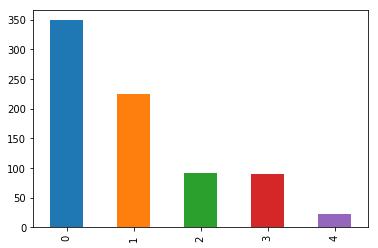

In [101]:
data['Column14'].value_counts().plot.bar()

# Experiment

In [105]:
#fill NaN with median

cv = 5
gnb = GaussianNB()

# train
X_train,X_test,y_train,y_test=X_train, X_test, y_train, y_test = train_test_split(data.drop('Column14', axis=1), data.Column14,test_size=0.2)

gnb_f1_scores = cross_val_score(gnb, data.loc[:, data.columns != 'Column14']\
                , data['Column14'], cv=cv, scoring='f1_micro')
gnb_accuracy_scores = cross_val_score(gnb, data.loc[:, data.columns != 'Column14']\
                , data['Column14'], cv=cv, scoring='accuracy')
print("F1 Score: {:.4f} +- {:.4f}".format(gnb_f1_scores.mean(), gnb_f1_scores.std()))
print("Accuracy Score: {:.4f} +- {:.4f}".format(gnb_accuracy_scores.mean(), gnb_accuracy_scores.std()))

F1 Score: 0.5521 +- 0.0318
Accuracy Score: 0.5521 +- 0.0318


In [155]:
#fill NaN with mode

cv = 5
gnb = GaussianNB()

# train
X_train,X_test,y_train,y_test=X_train, X_test, y_train, y_test = train_test_split(data.drop('Column14', axis=1), data.Column14,test_size=0.2)

gnb_f1_scores = cross_val_score(gnb, data.loc[:, data.columns != 'Column14']\
                , data['Column14'], cv=cv, scoring='f1_micro')
gnb_accuracy_scores = cross_val_score(gnb, data.loc[:, data.columns != 'Column14']\
                , data['Column14'], cv=cv, scoring='accuracy')
print("F1 Score: {:.4f} +- {:.4f}".format(gnb_f1_scores.mean(), gnb_f1_scores.std()))
print("Accuracy Score: {:.4f} +- {:.4f}".format(gnb_accuracy_scores.mean(), gnb_accuracy_scores.std()))

F1 Score: 0.5381 +- 0.0394
Accuracy Score: 0.5381 +- 0.0394


# KNN

In [157]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# train
X_train, X_test, y_train, y_test = train_test_split(data.drop('Column14', axis=1), data.Column14,test_size=0.2)
knn.fit(X_train,y_train)

knn_f1_scores = cross_val_score(knn, data.loc[:, data.columns != 'Column14']\
                , data['Column14'], cv=cv, scoring='f1_micro')
knn_accuracy_scores = cross_val_score(knn, data.loc[:, data.columns != 'Column14']\
                , data['Column14'], cv=cv, scoring='accuracy')
print("F1 Score: {:.4f} +- {:.4f}".format(knn_f1_scores.mean(), knn_f1_scores.std()))
print("Accuracy Score: {:.4f} +- {:.4f}".format(knn_accuracy_scores.mean(), knn_accuracy_scores.std()))

F1 Score: 0.4826 +- 0.0201
Accuracy Score: 0.4826 +- 0.0201


# ID3

In [158]:
rand = 5
id3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# train
X_train, X_test, y_train, y_test = train_test_split(data.drop('Column14', axis=1), data.Column14,test_size=0.2)
id3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [161]:
# scores
id3_f1_scores = cross_val_score(id3, data.loc[:, data.columns != 'Column14']\
                , data['Column14'], cv=cv, scoring='f1_micro')
id3_accuracy_scores = cross_val_score(id3, data.loc[:, data.columns != 'Column14']\
                , data['Column14'], cv=cv, scoring='accuracy')
print("F1 Score: {:.4f} +- {:.4f}".format(id3_f1_scores.mean(), id3_f1_scores.std()))
print("Accuracy Score: {:.4f} +- {:.4f}".format(id3_accuracy_scores.mean(), id3_accuracy_scores.std()))

F1 Score: 0.5302 +- 0.0173
Accuracy Score: 0.5302 +- 0.0173


In [162]:
parameters = {'max_depth':[3,6,9,12,15], 'min_samples_split':[2,4,8,16], 'min_samples_leaf':[1,2,4,8,16], 'max_features':[2,4,8,10]}
grid_search = GridSearchCV(id3, parameters, cv=5)
grid_search.fit(X_train,y_train)


print(id3.score(X_test,y_test))
print(grid_search.score(X_test,y_test))

0.532051282051282
0.5064102564102564


In [163]:
print(classification_report(id3.predict(X_test),y_test))

             precision    recall  f1-score   support

          0       0.77      0.66      0.71        76
          1       0.58      0.50      0.54        58
          2       0.00      0.00      0.00         0
          3       0.18      0.18      0.18        22
          4       0.00      0.00      0.00         0

avg / total       0.62      0.53      0.57       156



/home/restukartiko/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# One hot encoding

In [164]:
#One Hot Encoding

le = preprocessing.LabelEncoder()

le.fit(data['Column14'])
data['Column14'] = le.transform(data['Column14'])

data = pd.get_dummies(data)

y = data['Column14']
x = data.drop(['Column14'], 1)

# train
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [165]:
MLPlearn = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5, 2), random_state=1)
score = cross_val_score(MLPlearn, x, y, cv=10)
print("F1 Score: {} +- {}".format(score.mean(), score.std()))

F1 Score: 0.467290722824 +- 0.0399228916636


In [168]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(14,), random_state=1)
data.loc[:, data.columns != 'b']
mlp_f1_scores = cross_val_score(mlp, x\
                , y, cv=5, scoring='f1_micro')
print("F1 Score: {} +- {}".format(mlp_f1_scores.mean(), mlp_f1_scores.std()))

F1 Score: 0.537842988461 +- 0.0198417360708
